<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe4_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

Entrada: Arreglo de n números.

Salida: Arreglo de entrada en orden de menor a mayor.

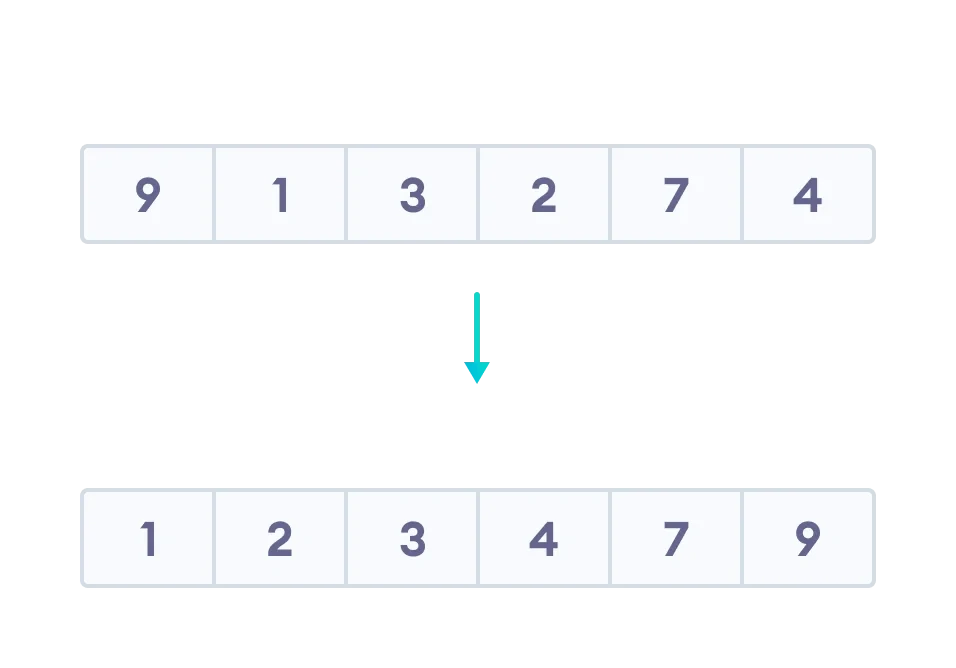

El problema de ordenamiento ha sido un problema que se ha investigado extensivamente desde el inicio de la computación. A pesar de lo simple de entender que es, solucionarlo de manera eficiente es una tarea compleja. Se han desarrollado diversos algoritmos para resolverlo, pero aún no hay una solución que sea eficiente para todos los casos.


# 2. QuickSort
# 2.1 Descripción del algoritmo
Quicksort recibe un arreglo de largo *n* como entrada. Luego, ordena sus elementos al separar el arreglo en 2 partes que son menores o mayores al pivote, y los ordena de manera recursiva.

1. Se elige un pivote que dividirá el arreglo en 2.
2. Se ordena los elementos de manera que los elementos menores al pivote queden a un lado, y los mayores al otro.
3. Se llama QuickSort para ordenar cada subarreglo, hasta que el arreglo esté completamente ordenado.

# 2.2 Código

In [1]:
import random

def partition(arreglo, p, r, modo, contador, verbose): # modo 0 = pivote es el elemento final, modo 1 = elemento inicial, modo 2 = elemento random de 3
    if verbose: print(f"Se llama partition() con el arreglo {arreglo[p:r+1]}")
    pivote = r
    if modo == 1: # decide cómo seleccionar el pivote
        arreglo[p], arreglo[r] = arreglo[r], arreglo[p]
    if modo == 2:
        if r - p > 3:
            rand = random.choices(arreglo[p:r + 1], k=3) # selecciona 3 elementos aleatorios de la lista
            rand.remove(min(rand)); rand.remove(max(rand)) # elimina el mínimo y el máximo para obtener la mediana
            idx = arreglo.index(rand[0])
            arreglo[idx], arreglo[r] = arreglo[r], arreglo[idx]
    if verbose: print(f"Pivote elegido: {arreglo[pivote]}")

    i = p - 1
    for j in range(p, r):
        if verbose: print(f"Se compara con {arreglo[j]}")

        if arreglo[j] <= arreglo[pivote]:
            i += 1
            contador[0] += 1
            arreglo[j], arreglo[i] = arreglo[i], arreglo[j]
            if verbose: print(f"Se intercambia y queda como {arreglo[p:r+1]}")
        if verbose: print()
            
    arreglo[pivote], arreglo[i+1] = arreglo[i+1], arreglo[pivote]
    if verbose: print(f"Arreglo al terminar partition(): {arreglo}"); print(); print()
    return i + 1

def quickSort(arreglo, p, r, modo, verbose = False, contador = [0]):
    if p >= r: return
    if verbose: print(f"Se llama quickSort() con el arreglo {arreglo[p:r+1]}")
    pivote = partition(arreglo, p, r, modo, contador, verbose)
    quickSort(arreglo, p, pivote - 1, modo, verbose, contador)
    quickSort(arreglo, pivote + 1 , r, modo, verbose, contador)
    
    return contador

# 2.3 Ejecución paso a paso

In [2]:
arreglo = [9, 5, 3, 7, 8, 2, 4]
print(arreglo)
quickSort(arreglo, 0, len(arreglo) - 1, 2, True)
print(arreglo)

[9, 5, 3, 7, 8, 2, 4]
Se llama quickSort() con el arreglo [9, 5, 3, 7, 8, 2, 4]
Se llama partition() con el arreglo [9, 5, 3, 7, 8, 2, 4]
Pivote elegido: 7
Se compara con 9

Se compara con 5
Se intercambia y queda como [5, 9, 3, 4, 8, 2, 7]

Se compara con 3
Se intercambia y queda como [5, 3, 9, 4, 8, 2, 7]

Se compara con 4
Se intercambia y queda como [5, 3, 4, 9, 8, 2, 7]

Se compara con 8

Se compara con 2
Se intercambia y queda como [5, 3, 4, 2, 8, 9, 7]

Arreglo al terminar partition(): [5, 3, 4, 2, 7, 9, 8]


Se llama quickSort() con el arreglo [5, 3, 4, 2]
Se llama partition() con el arreglo [5, 3, 4, 2]
Pivote elegido: 2
Se compara con 5

Se compara con 3

Se compara con 4

Arreglo al terminar partition(): [2, 3, 4, 5, 7, 9, 8]


Se llama quickSort() con el arreglo [3, 4, 5]
Se llama partition() con el arreglo [3, 4, 5]
Pivote elegido: 5
Se compara con 3
Se intercambia y queda como [3, 4, 5]

Se compara con 4
Se intercambia y queda como [3, 4, 5]

Arreglo al terminar partition(

# 3. Tiempo de de ejecucción
El algoritmo Quicksort tiene una complejidad temporal en el mejor y el caso promedio de $O(nlogn)$, esto es debido a que recursivamente este va dividiendo en sub-arreglos y luego los recorre para ordenarlos. En el peor caso la complejidad temporal sube a $O(n^2)$, esto es debido a que el arreglo original entregado se encontraba en su mayoría ya ordenado y el pivote se encuentra en el dato mayor, en otras palabras, en la posición más a la derecha.

La función de recurrencia que representa el QuickSort cuando se encuentra balanceado es la siguiente: 

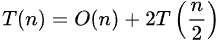

La imagen como ya se ha dicho representa el mejor y el caso promedio, donde el arreglo se va recursivamente dividiendo a la mitad para finalmente entregado de forma ordenada.

En el peor caso:

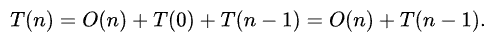

En el peor caso el $n-1$ representa el algoritmo intentado hacer comparaciones con el pivote, pero como el pivote es el dato mayor, simplemente se recorre el arreglo hasta la posición $n-1$.

#4. Correctitud de Partition
## Teorema
La función *Partition* recibe un arreglo y lo separa en 2 partes, dejando un pivote en el centro. Luego, ordena las 2 partes según su valor comparado al pivote y retorna el arreglo reordenado.

## Prueba del teorema
En cada iteración, se compara el valor de una casilla con el del pivote, y luego se intercambia su posición dependiendo de si su valor es menor o mayor. Considerando *p* como la posición del inicio del arreglo, *r* como el fin, *i* como la posición en donde comienzan los elementos mayores, y *j* como el punto hasta donde se ha recorrido el arreglo, probaremos la siguiente propiedad invariante:

> Al final de cada iteración, los elementos anteriores a *i* son menores al pivote, y los que están entre *i* y *j* son mayores al pivote.

## Inicialización
Al comienzo de la primera iteración (*i = -1* y *j = 0*), no hay elementos entre *i* y *j*, por lo tanto, se cumple la propiedad.

## Mantención
Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad.

Durante la iteración, se compara el elemento en *j* con el pivote, y si es menor se intercambia con la casilla que divide los elementos menores y mayores.

Al final de la iteración, *i* avanza o no dependiendo de si el valor es mayor o menor, y se sigue cumpliendo la propiedad.

## Correctitud de Partition
Como la propiedad del bucle invariante se cumple al comienzo y al terminar cada iteración, se puede decir que al finalizar el algoritmo se genera un arreglo con los mismos elementos del arreglo de entrada, pero separados entre menor y mayor con respecto al valor del pivote.

## Correctitud de QuickSort

Probaremos la correctitud de QuickSort usando inducción matemática. Nuestra hipótesis P(n) es que QuickSort retorna el arreglo de entrada ordenada de menor a mayor.

En el caso base, cuando n = 1, QuickSort no realiza cambios porque el arreglo ya está ordenado. Por lo tanto, se cumple la hipótesis.

Para el paso inductivo probaremos P(m). Si QuickSort se llama en un arreglo de largo n, también se van a llamar 2 recursivamente en subarreglos de largo m1 y m2, y se cumple que m1 < n y m2 < n. Se utiliza Partition para encontrar el pivote, y también separar los subarreglos en elementos menores al pivote y mayores al pivote. Por lo tanto, QuickSort es correcto.

#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del **Quick Sort** en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobará el número de comparaciones que el **Quick Sort** necesita realizar para poder ordenar una lista en su totalidad.

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones del peor caso calculadas matemáticamente ($n^2$ comparaciones si se forma un árbol desbalanceado)
* La cantidad de comparaciones del mejor caso calculadas matemáticamente ($n*log(n)$ comparaciones si se forma un árbol balanceado)
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

Para un problema que tiene un tamaño $n \in [5,20]$

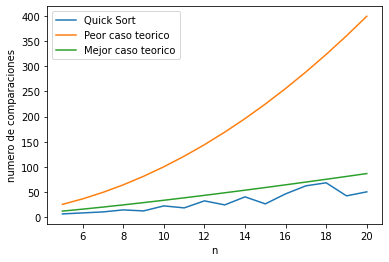

In [8]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(5,21)] 
y1=[n*n for n in range(5,21)] # Peor caso
y2=[n*math.log2(n) for n in range(5,21)] # Mejor caso
y=[]; 

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  constante = 2
  counter = quickSort(a,0,len(a)-1, 2, False, [0])[0] * constante
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Quick Sort", "Peor caso teorico", "Mejor caso teorico"])

plt.xlabel('n')
plt.ylabel('numero de comparaciones')
plt.show()

###Análisis de resultados

Como se puede apreciar en el gráfico, el número de comparaciones que realiza en promedio el algoritmo oscila alrededor del mejor caso, esto era de esperarse ya que el **Quick Sort** tiene una implementación similar a la del **Merge Sort** el cual tiene el mismo comportamiento.

##5.2. Rendimiento según el pivote

En este experimento se probará si el rendimiento del algoritmo **Quick Sort** se ve afectado según la posición donde se coloque el pivote.

* El tiempo de ejecución de **Quick Sort** con el pivote al inicio (la linea azul)
* El tiempo de ejecución de **Quick Sort** con el pivote en la mediana (la linea naranja)
* El tiempo de ejecución de **Quick Sort** con el pivote al final (la linea verde)

Para un problema que tiene un tamaño $n \in [5,75]$

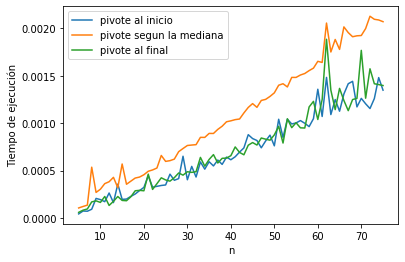

In [12]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x=[n for n in range(5,76)] 
y1=[] # pivote al inicio
y2=[] # pivote segun la mediana
y3=[] # pivote al final

for n in range(5,76):
  a = random.sample(range(1, 100), n)

  y1.append(repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},0, {len(a) - 1}, 0, False, [0])", repeat=1, number=10))

  y2.append(repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},0, {len(a) - 1}, 2, False, [0])", repeat=1, number=10))

  y3.append(repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},0, {len(a) - 1}, 1, False, [0])", repeat=1, number=10))

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["pivote al inicio", "pivote segun la mediana", "pivote al final"])

plt.xlabel('n')
plt.ylabel('Tiempo de ejecución')
plt.show()

## Análisis
Se puede observar que el tiempo de ejecución es mayor para el QuickSort que usa el pivote según la mediana, pero este modo presenta menor variación en su tiempo comparado al resto. El tiempo del algoritmo que usa el pivote al inicio y el del algoritmo que usa el pivote al final es similar.

##5.3. Comparación entre algoritmos

En este experimento se compararán dos algoritmos recursivos el **Quick Sort** y el **Merge Sort**, en específico se comparará el número de comparaciones que realizan ambos algoritmos. También se comparará el **Quick Sort** con los pivotes al inicio, en la mediana y al final

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones que el **Quick Sort** con el pivote al inicio realiza (la gráfica azul)
* La cantidad de comparaciones que el **Quick Sort** con el pivote en la mediana realiza (la gráfica naranja)
* La cantidad de comparaciones que el **Quick Sort** con el pivote al final realiza (la gráfica verde)
* La cantidad de comparaciones que el **Merge Sort** realiza (la gráfica roja).

para un problema que tiene un tamaño $n \in [5,50]$

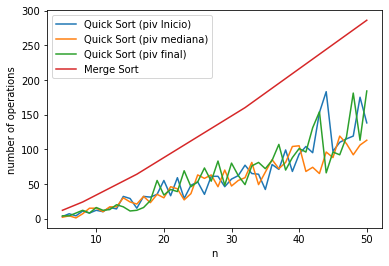

In [13]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y1=[]
y2=[]
y3=[]
y4=[]

for n in range(5,51):
  a = random.sample(range(1, 100), n)

  y1.append(quickSort(a.copy(),0,len(a)-1, 0, False, [0])[0])

  y2.append(quickSort(a.copy(),0,len(a)-1, 2, False, [0])[0])

  y3.append(quickSort(a.copy(),0,len(a)-1, 1, False, [0])[0])

  y4.append(mergeSort(a.copy(), [0])[0])

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(["Quick Sort (piv Inicio)","Quick Sort (piv mediana)","Quick Sort (piv final)", "Merge Sort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###Análisis de resultados

Como se puede observar en la gráfica, todas las versiones de **QuickSort** realizan menos comparaciones que MergeSort, pero la cantidad de comparaciones de MergeSort es más estable.

#6. Anexos

##6.1. Códigos para las presentaciones graficas

A continuación, puede ver el código del algoritmo **Merge Sort**, esta implementación del **Merge Sort** es necesaria para hacer la gráfica mostrada en el punto 5.3.

In [6]:
# https://www.geeksforgeeks.org/merge-sort/
def mergeSort(arr, counter):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        mergeSort(L, counter)
        mergeSort(R, counter)
        i = j = k = 0
        while i < len(L) and j < len(R):
            counter[0] += 1
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            counter[0] += 1
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            counter[0] += 1
            arr[k] = R[j]
            j += 1
            k += 1
    return counter